<a href="https://colab.research.google.com/github/ShrutikaK2911/AI-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

In [2]:
url='https://raw.githubusercontent.com/Google-Developer-Student-Club-CCOEW/AI-ML/main/data/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("Number of rows present in the dataset are: ", df.shape)

Number of rows present in the dataset are:  (768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


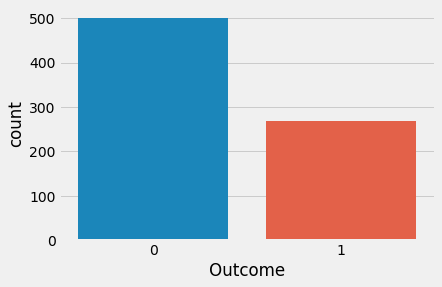

In [7]:
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

sns.countplot(df['Outcome'])
plt.show()

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

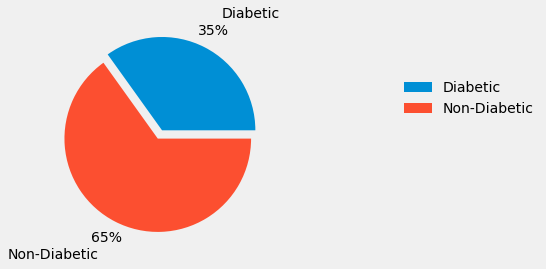

In [9]:
fig, ax = plt.subplots()

labels = ['Diabetic', 
         'Non-Diabetic']
percentages = [34.89, 65.10]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [10]:
for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 0
The minimum value fore the columns BloodPressure is 0
The minimum value fore the columns SkinThickness is 0
The minimum value fore the columns Insulin is 0
The minimum value fore the columns BMI is 0.0
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


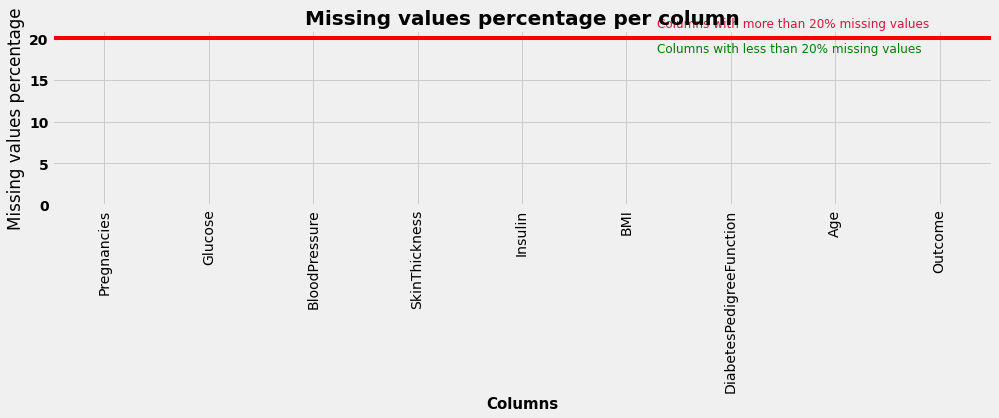

In [11]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df, 20, color=sns.color_palette('Reds',15))

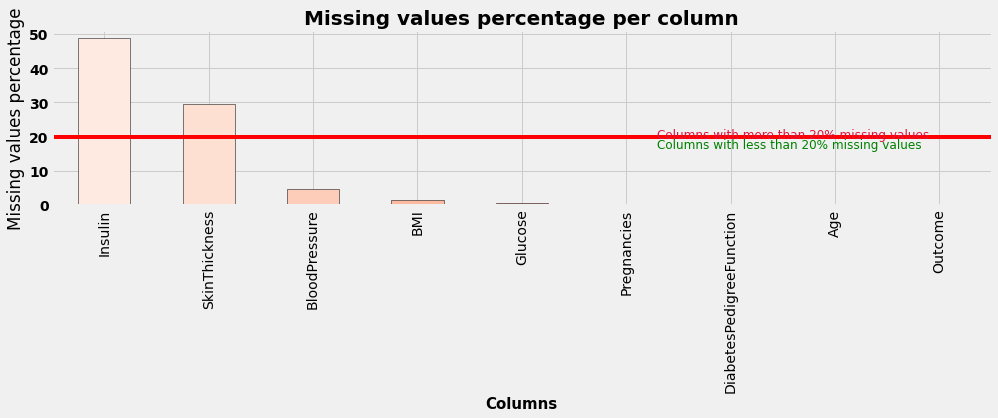

In [12]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
msv_1(df, 20, color=sns.color_palette('Reds',15))

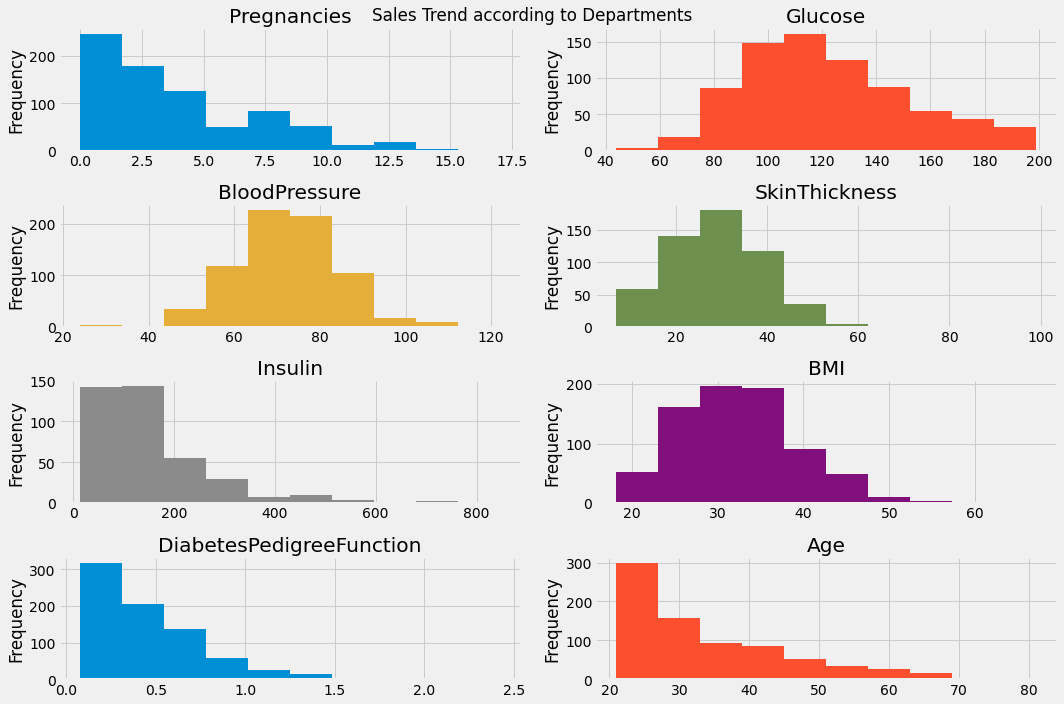

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = df.drop('Outcome', axis = 1).columns
for col in columns:
    df[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color = next(color_cycle))
    ax_idx += 1

plt.suptitle('Sales Trend according to Departments')
plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


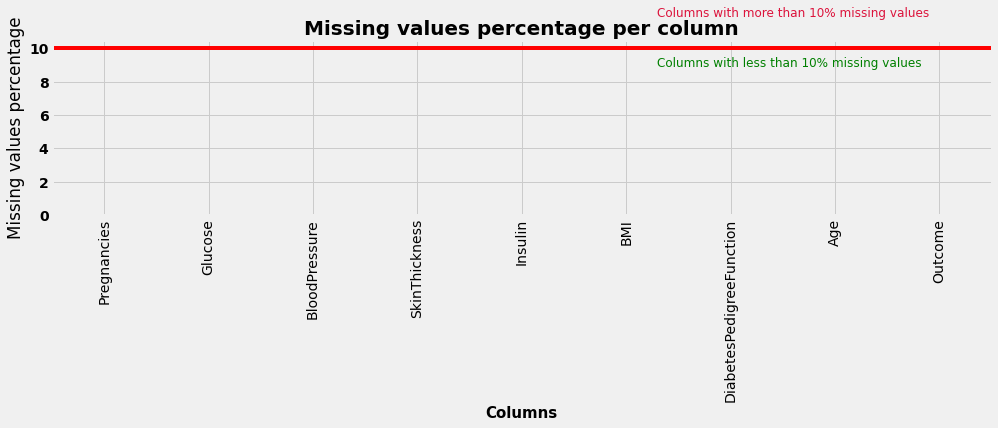

In [15]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())
msv_1(df, 10, color=sns.color_palette('Greens',15))

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
def mean_target(var):
    """
    A function that will return the mean values for 'var' column depending on whether the person
    is diabetic or not
    """
    return pd.DataFrame(df.groupby('Outcome').mean()[var])
def distplot(col_name):
    """
    A function that will plot the distribution of column 'col_name' for diabetic and non-diabetic people separately
    """
    plt.figure()
    ax = sns.distplot(df[col_name][df.Outcome == 1], color ="red", rug = True)
    sns.distplot(df[col_name][df.Outcome == 0], color ="lightblue",rug = True)
    plt.legend(['Diabetes', 'No Diabetes'])

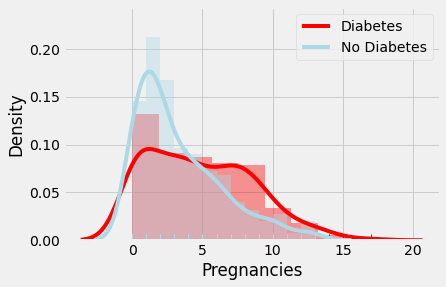

In [18]:
distplot('Pregnancies')

In [19]:
mean_target('Pregnancies')

,Pregnancies
Outcome,
0,3.298000
1,4.865672


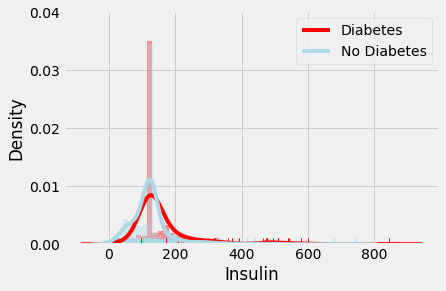

In [20]:
distplot('Insulin')

In [21]:
mean_target('Insulin')

,Insulin
Outcome,
0,127.792000
1,164.701493


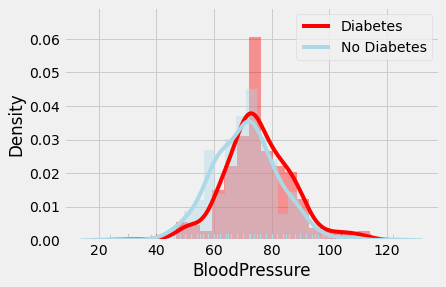

In [22]:
distplot('BloodPressure')

In [23]:
mean_target('Glucose')

,Glucose
Outcome,
0,110.710121
1,142.165573


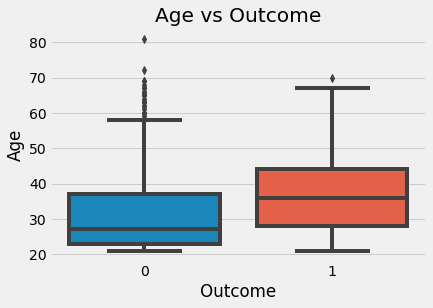

In [24]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)
plt.title('Age vs Outcome')
plt.show()

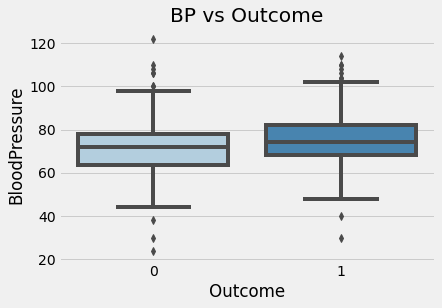

In [25]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df, palette = 'Blues')
plt.title('BP vs Outcome')
plt.show()

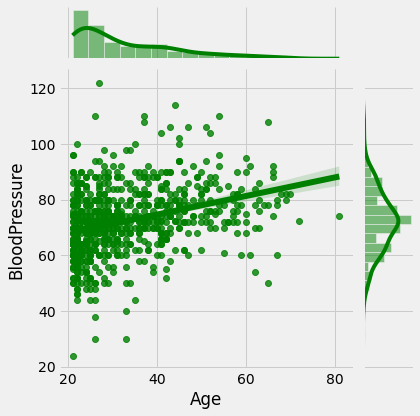

In [26]:
sns.jointplot(x='Age',y='BloodPressure', data=df, kind = 'reg', color = 'green')

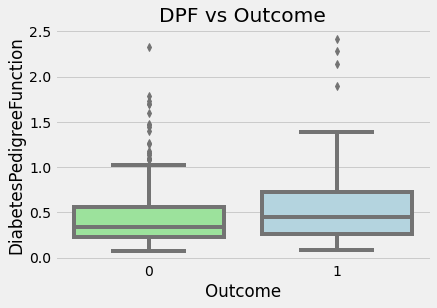

In [27]:
my_pal = {0: "lightgreen", 1: "lightblue"}
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df, palette = my_pal)
plt.title('DPF vs Outcome')
plt.show()

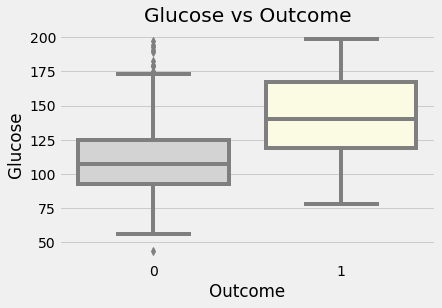

In [28]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df, palette = my_pal)
plt.title('Glucose vs Outcome')
plt.show()

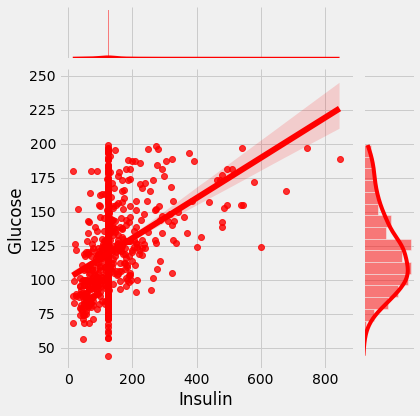

In [29]:
sns.jointplot(x='Insulin',y='Glucose', data=df, kind = 'reg', color = 'red')
plt.show()

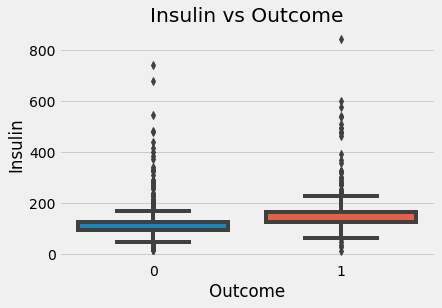

In [30]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df)
plt.title('Insulin vs Outcome')
plt.show()

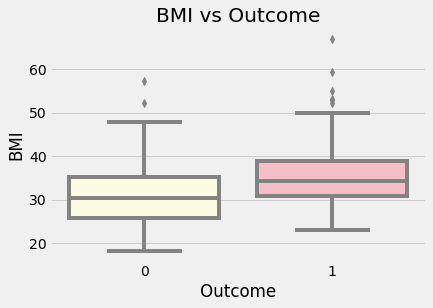

In [31]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Outcome', y = 'BMI', data = df, palette = my_pal)
plt.title('BMI vs Outcome')
plt.show()

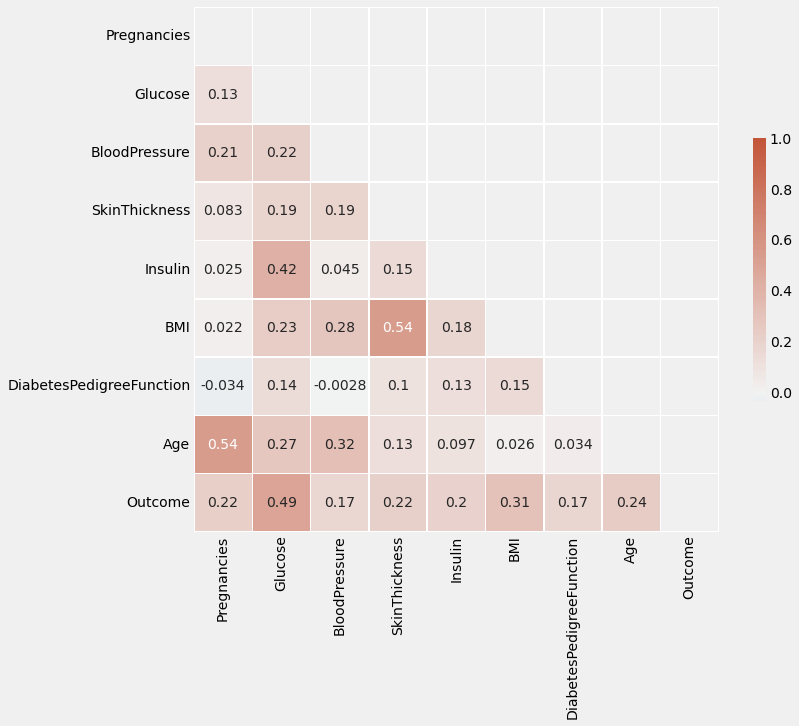

In [32]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [36]:

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    A function that returns the score of every evaluation metrics
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"F1 Score: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [37]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 78.99%
_______________________________________________
F1 Score: 0.66
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.803828    0.753165  0.789931    0.778496      0.786148
recall       0.896000    0.592040  0.789931    0.744020      0.789931
f1-score     0.847415    0.662953  0.789931    0.755184      0.783045
support    375.000000  201.000000  0.789931  576.000000    576.000000
_______________________________________________
Confusion Matrix: 
 [[336  39]
 [ 82 119]]


Test Result:
Accuracy Score: 72.40%
_______________________________________________
F1 Score: 0.56
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760870   0.629630  0.723958    0.695250      0.715072
recall       0.840000   0.507463  0.723958    0.673731      0.723958
f1-score 

In [38]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
F1 Score: 1.0
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    375.0  201.0       1.0      576.0         576.0
_______________________________________________
Confusion Matrix: 
 [[375   0]
 [  0 201]]


Test Result:
Accuracy Score: 69.27%
_______________________________________________
F1 Score: 0.54
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.750000   0.566667  0.692708    0.658333      0.686024
recall       0.792000   0.507463  0.692708    0.649731      0.692708
f1-score     0.770428   0.535433  0.692708    0.652931      0.68